In [1]:
#Importing all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading and normalizing the data
df_X = pd.read_pickle('X_train.pkl')
df_y = pd.read_pickle('y_train.pkl')

df_X['num_questions'] = df_X['num_questions']/df_X['article_length']
df_X['num_exclamations'] = df_X['num_exclamations']/df_X['article_length']
df_X['ENT_PERSON'] = df_X['ENT_PERSON']/df_X['article_length']
df_X['ENT_NORP'] = df_X['ENT_NORP']/df_X['article_length']
df_X['ENT_ORG'] = df_X['ENT_ORG']/df_X['article_length']
df_X['ENT_LOCATION'] = df_X['ENT_LOCATION']/df_X['article_length']
df_X['ENT_PRODUCT'] = df_X['ENT_PRODUCT']/df_X['article_length']
df_X['ENT_LANGUAGE'] = df_X['ENT_LANGUAGE']/df_X['article_length']
df_X['ENT_OTHERS'] = df_X['ENT_OTHERS']/df_X['article_length']
df_X['POS_ADJ'] = df_X['POS_ADJ']/df_X['article_length']
df_X['POS_ADV'] = df_X['POS_ADV']/df_X['article_length']
df_X['POS_PROPN'] = df_X['POS_PROPN']/df_X['article_length']
df_X['POS_NUM'] = df_X['POS_NUM']/df_X['article_length']
df_X['POS_AUX'] = df_X['POS_AUX']/df_X['article_length']

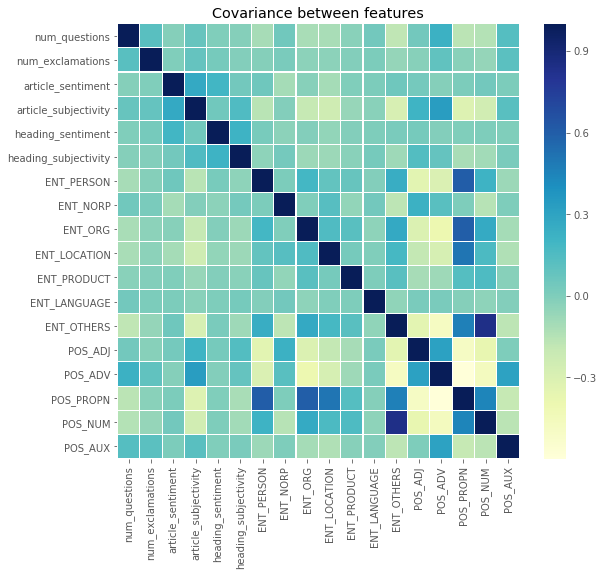

In [3]:
#Covariance Matrix of different variables
df_corr_vars = df_X.iloc[:,16:]
plt.style.use('ggplot')
corrmat = df_corr_vars.corr() 
f, ax = plt.subplots(figsize =(9, 8)) 
_ = sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)
_ = plt.title('Covariance between features')

In [4]:
#Creating a combined data frame
df = pd.concat([df_X, df_y], axis=1)
df['label'] = df['label'].apply(lambda x: 'regular' if x == 0 else 'opinion')

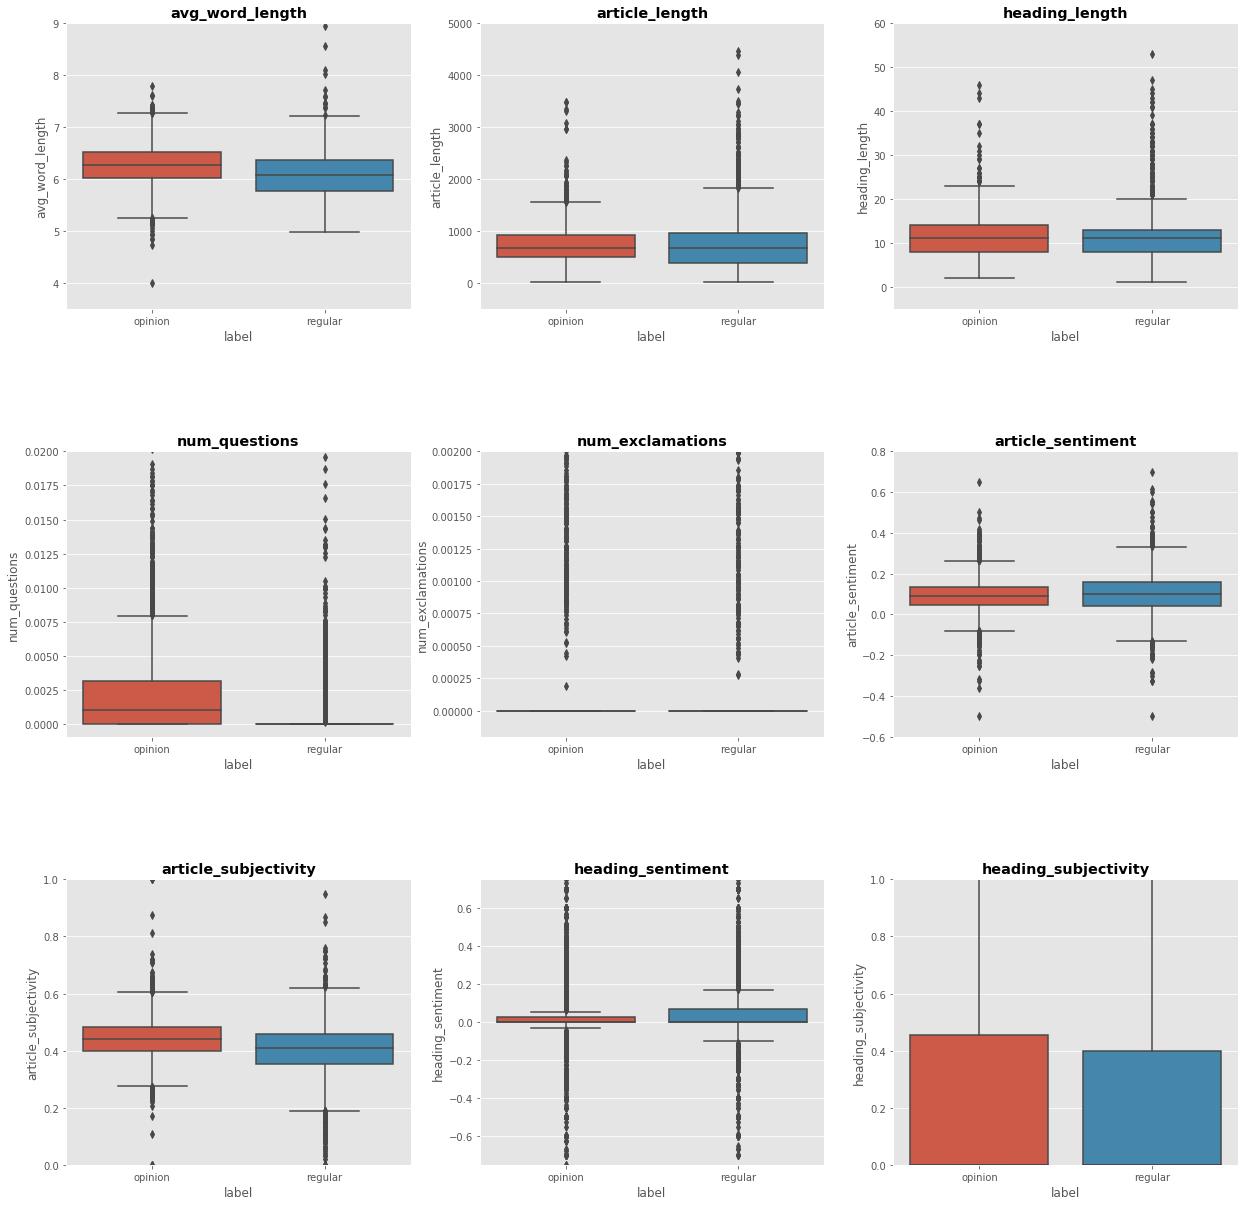

In [5]:
#Generating the plots
fig, ax = plt.subplots(3,3, figsize=(21,21))
plt.subplots_adjust(hspace=1)
plt.subplots_adjust(hspace=0.5)
plt.style.use('ggplot')
corr_cols = ['avg_word_length', 'article_length',
       'heading_length', 'num_questions', 'num_exclamations',
       'article_sentiment', 'article_subjectivity', 'heading_sentiment',
       'heading_subjectivity']

y_lims = [[3.5, 9,5], [-500,5000], [-5, 60], [-0.0009,0.02], [-0.0002, 0.002], [-0.6, 0.8], [0, 1], [-0.75, 0.75], [0, 1]]

for i in range(3):
    for j in range(3):

        _ = ax[i, j].set_title(corr_cols[0], fontweight='bold')
        
        _ = sns.boxplot(x='label',y=corr_cols[0],data=df, ax=ax[i][j])
        _ = ax[i, j].set_ylim(y_lims[0][0], y_lims[0][1])
        
        corr_cols = corr_cols[1:]
        y_lims = y_lims[1:]